## ECG Heartbeat Categorization

> This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database.

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# importing dataset from drive

data = pd.read_csv("../input/heartbeat/mitbih_train.csv", header=None)
df = pd.DataFrame(data)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# showing column wise %ge of NaN values they contains 
null_col = []

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)
  if df[i].isna().mean()*100 > 0:
    null_col.append(i)


0 	-	 0.0
1 	-	 0.0
2 	-	 0.0
3 	-	 0.0
4 	-	 0.0
5 	-	 0.0
6 	-	 0.0
7 	-	 0.0
8 	-	 0.0
9 	-	 0.0
10 	-	 0.0
11 	-	 0.0
12 	-	 0.0
13 	-	 0.0
14 	-	 0.0
15 	-	 0.0
16 	-	 0.0
17 	-	 0.0
18 	-	 0.0
19 	-	 0.0
20 	-	 0.0
21 	-	 0.0
22 	-	 0.0
23 	-	 0.0
24 	-	 0.0
25 	-	 0.0
26 	-	 0.0
27 	-	 0.0
28 	-	 0.0
29 	-	 0.0
30 	-	 0.0
31 	-	 0.0
32 	-	 0.0
33 	-	 0.0
34 	-	 0.0
35 	-	 0.0
36 	-	 0.0
37 	-	 0.0
38 	-	 0.0
39 	-	 0.0
40 	-	 0.0
41 	-	 0.0
42 	-	 0.0
43 	-	 0.0
44 	-	 0.0
45 	-	 0.0
46 	-	 0.0
47 	-	 0.0
48 	-	 0.0
49 	-	 0.0
50 	-	 0.0
51 	-	 0.0
52 	-	 0.0
53 	-	 0.0
54 	-	 0.0
55 	-	 0.0
56 	-	 0.0
57 	-	 0.0
58 	-	 0.0
59 	-	 0.0
60 	-	 0.0
61 	-	 0.0
62 	-	 0.0
63 	-	 0.0
64 	-	 0.0
65 	-	 0.0
66 	-	 0.0
67 	-	 0.0
68 	-	 0.0
69 	-	 0.0
70 	-	 0.0
71 	-	 0.0
72 	-	 0.0
73 	-	 0.0
74 	-	 0.0
75 	-	 0.0
76 	-	 0.0
77 	-	 0.0
78 	-	 0.0
79 	-	 0.0
80 	-	 0.0
81 	-	 0.0
82 	-	 0.0
83 	-	 0.0
84 	-	 0.0
85 	-	 0.0
86 	-	 0.0
87 	-	 0.0
88 	-	 0.0
89 	-	 0.0
90 	-	 0.0
91 	-	 0.

> Since data does'nt contain any null values, we can move further

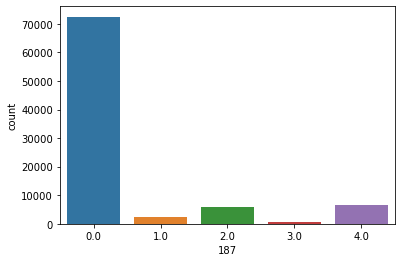

In [ ]:
classes = []
sns.countplot(x=187, data = df) 

> Here this bar graph easily shows how data is imbalanced. More than 80% data is in class 0. So, first, we have to balance th data in to get more precise predictions.

> For balancing the data I'm using undersampling in which we will reduce the rows of class 0 to the number compareble to others/

In [ ]:
class_1 = df[df[187]==1.0]
class_2 = df[df[187]==2.0]
class_3 = df[df[187]==3.0]
class_4 = df[df[187]==4.0]
class_0 = df[df[187]==0.0].sample(n = 8000)

In [ ]:
new_df = pd.concat([class_0, class_1, class_2, class_3, class_4])

In [ ]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
61663,0.790780,0.608156,0.205674,0.173759,0.184397,0.195035,0.216312,0.202128,0.191489,0.175532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54930,0.964727,0.559083,0.000000,0.065256,0.056437,0.084656,0.142857,0.146384,0.155203,0.148148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8990,1.000000,0.659517,0.083110,0.109920,0.080429,0.024129,0.034853,0.000000,0.032172,0.072386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68696,0.995798,0.890756,0.691176,0.497899,0.247899,0.065126,0.018908,0.018908,0.035714,0.084034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11724,1.000000,0.754286,0.331429,0.245714,0.245714,0.234286,0.200000,0.274286,0.297143,0.280000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


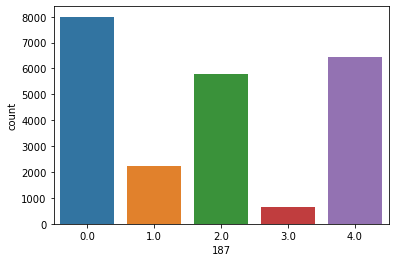

In [ ]:
sns.countplot(x=187, data = new_df) 

> Now for visualising each class, here is plot of any random sample of hearbeat in each class.

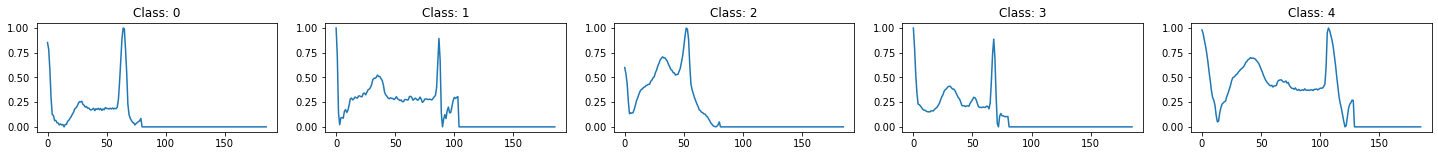

In [ ]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,2))

for i in range(5):
  ax[i].plot(new_df[new_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop([187], axis=1), new_df[187], test_size = 0.1)

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
clf = Sequential()

clf.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
clf.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
clf.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

clf.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
clf.add(Dropout(0.5))

clf.add(Flatten())

clf.add(Dense(units = 512, activation='relu'))
clf.add(Dense(units = 1024, activation='relu'))

clf.add(Dense(units = 5, activation='softmax'))


In [ ]:
clf.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = clf.fit(X_train, y_train, epochs = 10)

Epoch 1/10
650/650 [==============================] - 40s 62ms/step - loss: 0.3802 - accuracy: 0.8699
Epoch 2/10
650/650 [==============================] - 40s 62ms/step - loss: 0.2056 - accuracy: 0.9307
Epoch 3/10
650/650 [==============================] - 40s 61ms/step - loss: 0.1519 - accuracy: 0.9460
Epoch 4/10
650/650 [==============================] - 40s 62ms/step - loss: 0.1204 - accuracy: 0.9576
Epoch 5/10
650/650 [==============================] - 40s 61ms/step - loss: 0.1042 - accuracy: 0.9632
Epoch 6/10
650/650 [==============================] - 40s 62ms/step - loss: 0.0852 - accuracy: 0.9684
Epoch 7/10
650/650 [==============================] - 40s 61ms/step - loss: 0.0784 - accuracy: 0.9725
Epoch 8/10
650/650 [==============================] - 39s 61ms/step - loss: 0.0636 - accuracy: 0.9768
Epoch 9/10
650/650 [==============================] - 39s 61ms/step - loss: 0.0629 - accuracy: 0.9783
Epoch 10/10
650/650 [==============================] - 40s 62ms/step - loss: 0.051

In [ ]:
# Prediction

y_pred = clf.predict(X_test)

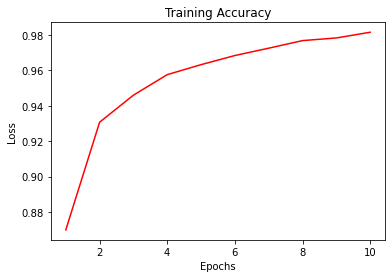

In [ ]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training acc')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

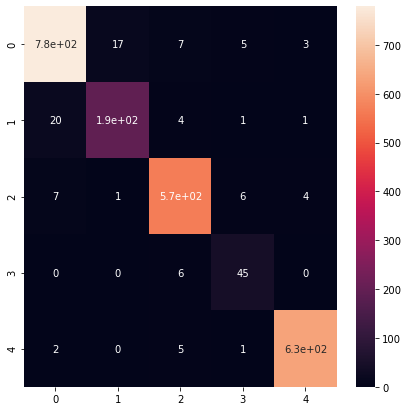

In [ ]:
from sklearn.metrics import confusion_matrix

y_lbl = [np.where(i == np.max(i))[0][0] for i in y_pred]
mat = confusion_matrix(y_test, y_lbl)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [ ]:
# Measure the Accuracy Score

from sklearn import metrics

print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(y_lbl, y_test)))


Accuracy score of the predictions: 0.9610220874837592


> As we can see above CNN got accuracy of 96.6%, now we can predict the vaalues for our test dataset.

***

In [ ]:
test_data = pd.read_csv("../input/heartbeat/mitbih_test.csv", header=None)
test_df = pd.DataFrame(test_data)

In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


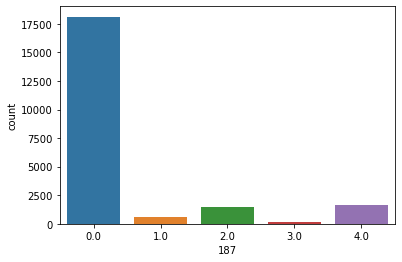

In [ ]:
classes = []
sns.countplot(x=187, data = test_df) 

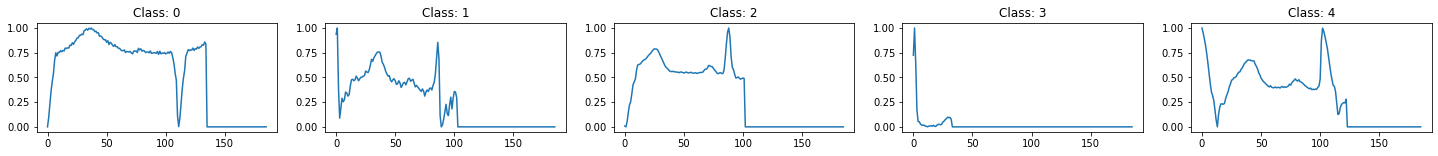

In [ ]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,2))

for i in range(5):
  ax[i].plot(test_df[test_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))


In [ ]:
test_X = test_df.drop([187], axis=1) 
test_y = test_df[187]

test_X = np.array(test_X).reshape(test_X.shape[0], test_X.shape[1], 1)

In [ ]:
test_pred_y = clf.predict(test_X)

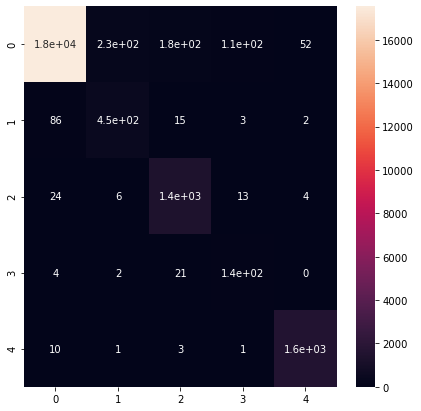

In [ ]:
from sklearn.metrics import confusion_matrix

test_lbl_y = [np.where(i == np.max(i))[0][0] for i in test_pred_y]
mat = confusion_matrix(test_y, test_lbl_y)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [ ]:
# Measure the Accuracy Score

from sklearn import metrics

print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(test_lbl_y, test_y)))


Accuracy score of the predictions: 0.9649186917595469


> And here our CNN got us 96.5% accuracy on test dataset